In [1]:
!unzip "/content/drive/MyDrive/brain_tumor_dataset.zip" -d "/content/drive/MyDrive"

Archive:  /content/drive/MyDrive/brain_tumor_dataset.zip
   creating: /content/drive/MyDrive/brain_tumor_dataset/
   creating: /content/drive/MyDrive/brain_tumor_dataset/no/
  inflating: /content/drive/MyDrive/brain_tumor_dataset/no/1 no.jpeg  
  inflating: /content/drive/MyDrive/brain_tumor_dataset/no/10 no.jpg  
  inflating: /content/drive/MyDrive/brain_tumor_dataset/no/11 no.jpg  
  inflating: /content/drive/MyDrive/brain_tumor_dataset/no/12 no.jpg  
  inflating: /content/drive/MyDrive/brain_tumor_dataset/no/13 no.jpg  
  inflating: /content/drive/MyDrive/brain_tumor_dataset/no/14 no.jpg  
  inflating: /content/drive/MyDrive/brain_tumor_dataset/no/15 no.jpg  
  inflating: /content/drive/MyDrive/brain_tumor_dataset/no/17 no.jpg  
  inflating: /content/drive/MyDrive/brain_tumor_dataset/no/18 no.jpg  
  inflating: /content/drive/MyDrive/brain_tumor_dataset/no/19 no.jpg  
  inflating: /content/drive/MyDrive/brain_tumor_dataset/no/2 no.jpeg  
  inflating: /content/drive/MyDrive/brain_tum

In [2]:
DATASET_DIR = "/content/drive/MyDrive/brain_tumor_dataset"

In [25]:
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D
from keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense, AvgPool2D,MaxPool2D
from keras.models import Sequential, Model
# from keras.applications.vgg16 import VGG16, preprocess_input
from keras.optimizers import Adam, SGD, RMSprop

import tensorflow as tf

import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
os.listdir(DATASET_DIR)

['no', 'yes']

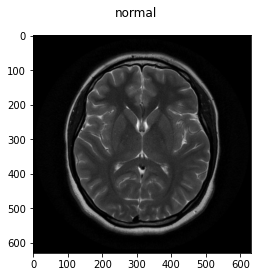

In [27]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

paths = glob.glob(DATASET_DIR + '/no/*')

normal_images = []
for img_path in paths:
    normal_images.append(mpimg.imread(img_path))

fig = plt.figure()
fig.suptitle('normal')
plt.imshow(normal_images[0], cmap='gray') 

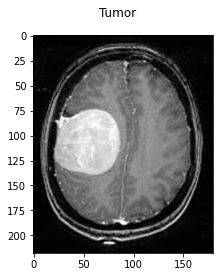

In [28]:
path = glob.glob(DATASET_DIR + '/yes/*')

covid_images = []
for img_path in path:
    covid_images.append(mpimg.imread(img_path))

fig = plt.figure()
fig.suptitle('Tumor')
plt.imshow(covid_images[0], cmap='gray') 

In [29]:
print(len(normal_images))
print(len(covid_images))

98
155


In [30]:
IMG_W = 150
IMG_H = 150
CHANNELS = 3

INPUT_SHAPE = (IMG_W, IMG_H, CHANNELS)
NB_CLASSES = 2
EPOCHS = 15
BATCH_SIZE = 32

In [31]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=INPUT_SHAPE))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(Conv2D(250,(3,3)))
model.add(Activation("relu"))
  
model.add(Conv2D(128,(3,3)))
model.add(Activation("relu"))
model.add(AvgPool2D(2,2))

model.add(Conv2D(256,(2,2)))
model.add(Activation("relu"))
model.add(MaxPool2D(2,2))
    
model.add(Flatten())
model.add(Dense(32))
model.add(Dropout(0.25))
model.add(Dense(1))
model.add(Activation("sigmoid"))

In [32]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [33]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_7 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_8 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 34, 34, 64)       

In [34]:
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.3)

train_generator = train_datagen.flow_from_directory(
    DATASET_DIR,
    target_size=(IMG_H, IMG_W),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    DATASET_DIR, 
    target_size=(IMG_H, IMG_W),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle= False,
    subset='validation')

history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // BATCH_SIZE,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // BATCH_SIZE,
    epochs = EPOCHS)

Found 178 images belonging to 2 classes.
Found 75 images belonging to 2 classes.


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
5/5 [==============================] - 12s 2s/step - loss: 0.6955 - accuracy: 0.6075 - val_loss: 0.6721 - val_accuracy: 0.5469
Epoch 2/15
5/5 [==============================] - 11s 2s/step - loss: 0.6858 - accuracy: 0.6265 - val_loss: 0.6836 - val_accuracy: 0.7031
Epoch 3/15
5/5 [==============================] - 11s 2s/step - loss: 0.6845 - accuracy: 0.5519 - val_loss: 0.6733 - val_accuracy: 0.6875
Epoch 4/15
5/5 [==============================] - 11s 2s/step - loss: 0.6549 - accuracy: 0.7060 - val_loss: 0.5787 - val_accuracy: 0.6875
Epoch 5/15
5/5 [==============================] - 11s 2s/step - loss: 0.5712 - accuracy: 0.7223 - val_loss: 0.6805 - val_accuracy: 0.6094
Epoch 6/15
5/5 [==============================] - 11s 2s/step - loss: 0.5414 - accuracy: 0.7618 - val_loss: 0.5871 - val_accuracy: 0.6875
Epoch 7/15
5/5 [==============================] - 11s 2s/step - loss: 0.5285 - accuracy: 0.7314 - val_loss: 0.5771 - val_accuracy: 0.6719
Epoch 8/15
5/5 [==================

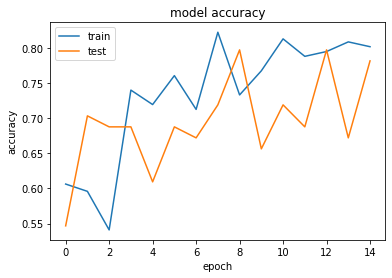

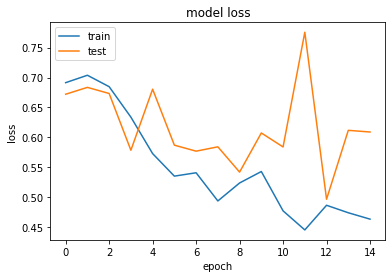

In [35]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [36]:
print("training_accuracy", history.history['accuracy'][-1])
print("validation_accuracy", history.history['val_accuracy'][-1])

training_accuracy 0.801369845867157
validation_accuracy 0.78125


In [37]:
label = validation_generator.classes

In [38]:
pred= model.predict(validation_generator)
predicted_class_indices=np.argmax(pred,axis=1)
labels = (validation_generator.class_indices)
labels2 = dict((v,k) for k,v in labels.items())
predictions = [labels2[k] for k in predicted_class_indices]

In [39]:
from sklearn.metrics import confusion_matrix

cf = confusion_matrix(predicted_class_indices,label)
cf

array([[29, 46],
       [ 0,  0]])

In [40]:
exp_series = pd.Series(label)
pred_series = pd.Series(predicted_class_indices)
pd.crosstab(exp_series, pred_series, rownames=['Actual'], colnames=['Predicted'],margins=True)

Predicted,0,All
Actual,,
0,29,29
1,46,46
All,75,75


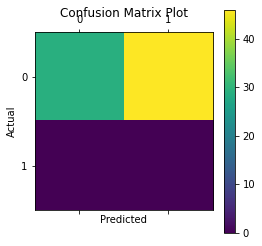

In [41]:
plt.matshow(cf)
plt.title('Confusion Matrix Plot')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show();